<h1 style='color:crimson'> Client-Focused Research Questions, Hypotheses 2, and Indicators (Jennifer Montgomery)</h1>

<h2 style='color:darkblue'>Hypothesis 2:</h2>

Houses with a grade of 8 or higher are concentrated in only a few premium neighborhoods, making location a key price driver.

Statement: Renovated homes with higher grades (8 or above) tend to have a higher market value compared to their counterparts in the same area.

Why it Matters (Client-Relevant Insight):

Jennifer wants a high-grade, prestigious home. If these homes are clustered in a few select neighborhoods, we can:

Identify the elite locations she should focus on.

Help her avoid wasting time looking in areas that don’t offer high-grade properties.

<h2 style='color:darkblue'>Testing Methods:</h2>

1. Grouped Bar Chart of Sale Prices: A visual comparison between renovated and unrenovated homes to observe the price difference.

2. T-test or ANOVA: Perform statistical tests to determine if there's a significant difference in mean sale prices between renovated and unrenovated homes.

3. Regression Model with Renovation as a Feature: Build a regression model where renovation status is one of the key variables to see how much renovation influences the sale price, adjusting for other factors like size, location, etc.

<h3 style='color:seagreen'>Import packages </h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style='color:seagreen'>Fetch data from king country house table without empty data(hypothesis 1)</h3>

In [2]:

# Load your dataset
df_houses = pd.read_csv('../data/king_country_house_data_index_false_filter.csv')
df_houses

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated,waterfront_status,grade_category
0,0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,Not Renovated,Non-Waterfront,Mid (6-8)
1,1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,Renovated,Non-Waterfront,Mid (6-8)
2,2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,Renovated,Non-Waterfront,Mid (6-8)
3,3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,Not Renovated,Non-Waterfront,Mid (6-8)
4,4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,Not Renovated,Non-Waterfront,High (8+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,Not Renovated,Non-Waterfront,High (8+)
21593,21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,Not Renovated,Non-Waterfront,High (8+)
21594,21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,Not Renovated,Non-Waterfront,Mid (6-8)
21595,21595,291310100,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3,...,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,Not Renovated,Non-Waterfront,High (8+)


<h3 style='color:seagreen'> Research Questions 1:</h3>

 Count of High-Grade Homes by Neighborhood

Group homes by zipcode and count how many have grade >= 8.

/tmp/ipykernel_739532/3635711196.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_grade_counts, x='zipcode', y='high_grade_count', palette='viridis')


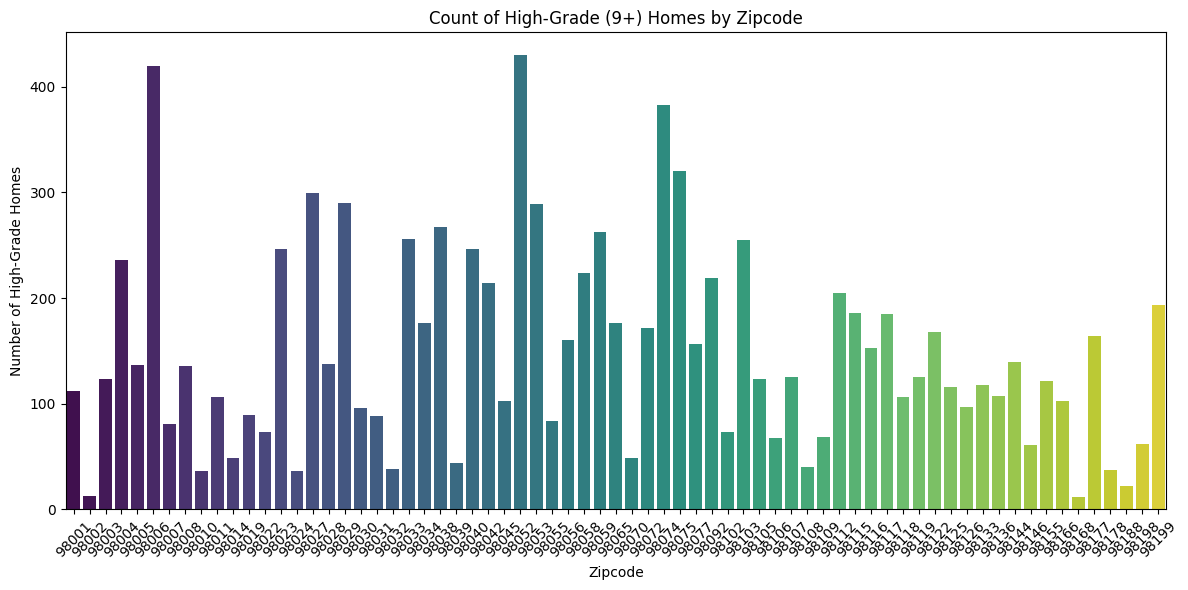

In [7]:
# Count of high-grade homes (grade >= 8) per zipcode
high_grade_counts = df_houses[df_houses['grade'] >= 8].groupby('zipcode').size().reset_index(name='high_grade_count')

# Optional: Filter zipcodes with significant counts
high_grade_counts = high_grade_counts[high_grade_counts['high_grade_count'] >= 10]

# Sort for plotting
high_grade_counts = high_grade_counts.sort_values(by='high_grade_count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=high_grade_counts, x='zipcode', y='high_grade_count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of High-Grade (9+) Homes by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of High-Grade Homes')
plt.tight_layout()
plt.show()

<h3 style='color:seagreen'>📌 Conclusion:</h3>


High-grade homes are not evenly distributed — instead, they are clustered in a few zipcodes.

This supports the hypothesis that location plays a key role and high-grade homes tend to appear in specific premium neighborhoods.

<h3 style='color:seagreen'>Research Questions 2:</h3>

 Average Price by Zipcode (to show premium areas)


To see if those areas are also high-priced:

/tmp/ipykernel_739532/3219845065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_zip.head(15), x='zipcode', y='price', palette='magma')


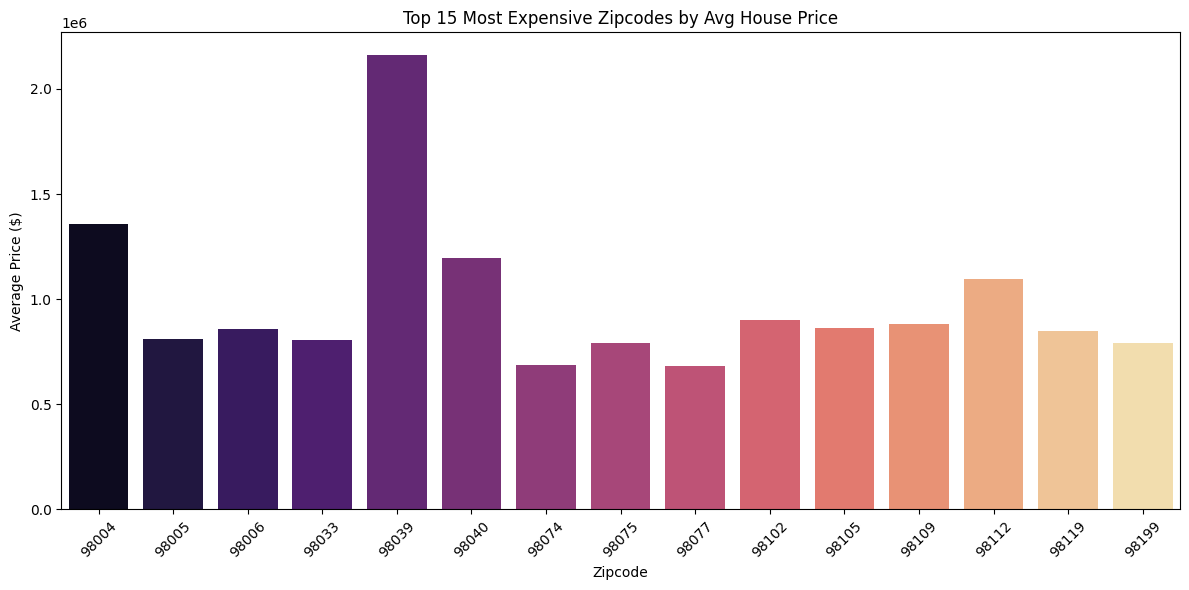

In [4]:
# Average price per zipcode
avg_price_zip = df_houses.groupby('zipcode')['price'].mean().reset_index().sort_values(by='price', ascending=False)

# Plot top 15 priciest zipcodes
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_zip.head(15), x='zipcode', y='price', palette='magma')
plt.title('Top 15 Most Expensive Zipcodes by Avg House Price')
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3 style='color:seagreen'>📌 Conclusion:</h3>


The same zipcodes that had many high-grade homes also appear here as high-price areas.

This reinforces the link between grade, location, and price.

Therefore, grade ≥8 homes tend to be more expensive, and found in high-value neighborhoods.

<h3 style='color:seagreen'>Research Questions 3:</h3>

Geographic Visualization (Optional Advanced)


You could use geospatial plots to visually show clusters if lat and long are present:

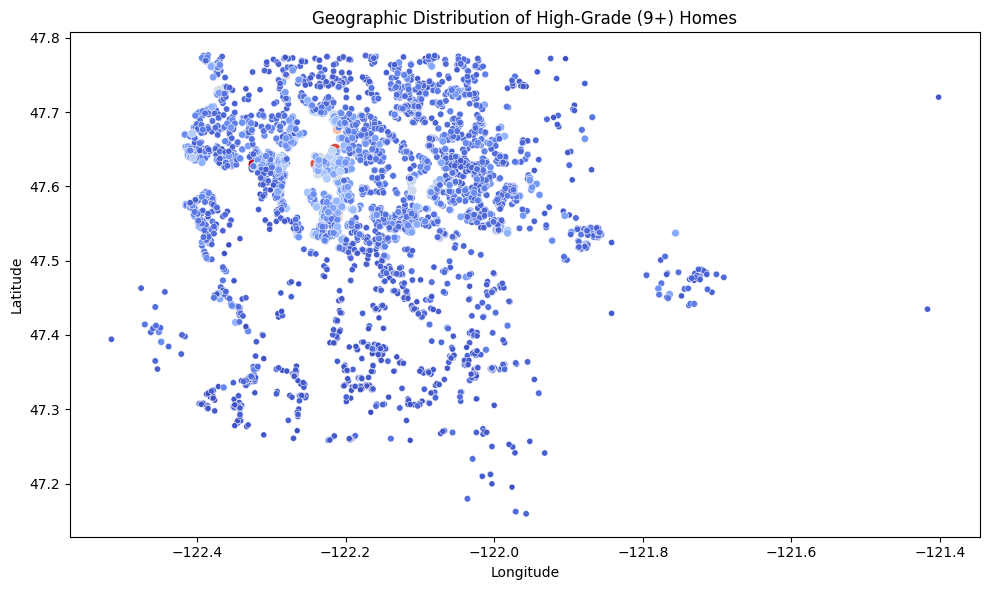

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_houses[df_houses['grade'] >= 8],
    x='long', y='lat',
    hue='price',
    palette='coolwarm',
    size='price',
    legend=False
)
plt.title('Geographic Distribution of High-Grade (8+) Homes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


<h3 style='color:seagreen'> 📌 Conclusion: </h3>


Clustering is visually confirmed: high-grade homes are geographically concentrated, especially near water or central areas.

This supports the idea of premium geographic clusters where high-grade homes and high prices go hand-in-hand.

Distribution Fit (for prices in these areas)

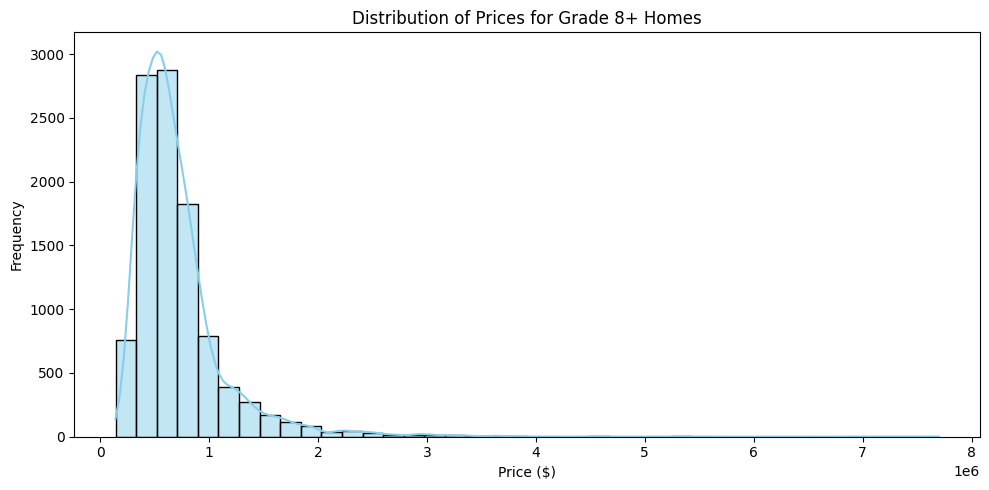

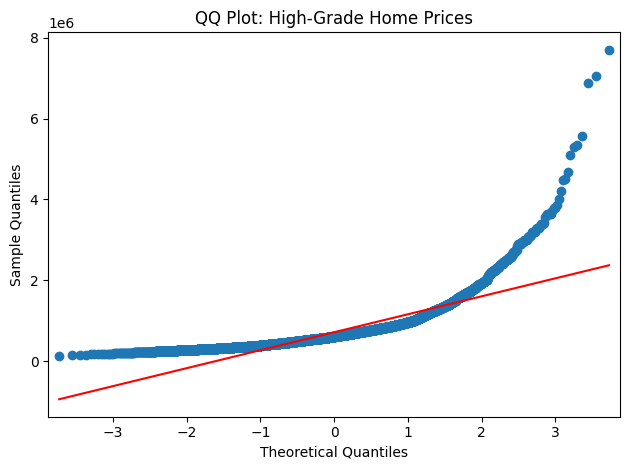

In [9]:
import scipy.stats as stats

# Filter to only high-grade homes
high_grade_prices = df_houses[df_houses['grade'] >= 8]['price']

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(high_grade_prices, kde=True, bins=40, color='skyblue')
plt.title('Distribution of Prices for Grade 8+ Homes')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Optional: Check normality with QQ plot
import statsmodels.api as sm
sm.qqplot(high_grade_prices, line='s')
plt.title('QQ Plot: High-Grade Home Prices')
plt.tight_layout()
plt.show()


 <h3 style='color:seagreen'>Result: </h3>


If the histogram is right-skewed (likely), a log-normal or exponential distribution might fit best.

If the QQ plot deviates from the line, it confirms non-normality — price often follows a log-normal distribution in real estate datasets.

<h3 style='color:seagreen'>✅ Final Verdict on Hypothesis 2: </h3>

✔️ Supported.

Homes with grade ≥ 8 are indeed concentrated in a few zipcodes, and those areas have higher average prices.
This implies that location is a key price driver for high-grade homes — exactly what Jennifer needs to know when searching for high-end properties.

Would you like to follow this with a regression model to test how much grade, location, and renovation impact price together?